In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
park = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/3_데이터 분석/전국도시공원표준데이터.csv', encoding = 'ms949')
park.shape

(18137, 20)

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
plt.rc('font', family='NanumGothic')

In [6]:
# Unnamed:19 라는 이상한 컬럼이 있다.
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [7]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [8]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [9]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [24]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 19'], inplace = True)

In [13]:
park.shape

(18137, 12)

<Axes: xlabel='경도', ylabel='위도'>

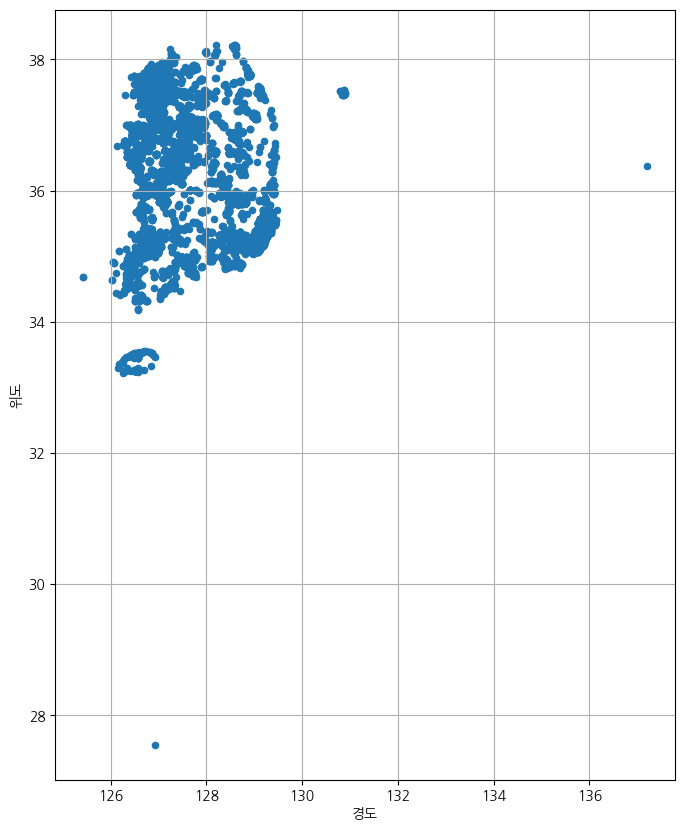

In [15]:
# 이상치가 있다는 것을 확인!
park.plot.scatter(x = '경도', y = '위도', figsize = (8,10), grid = True)

In [16]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

# 문제
### 위도 경도가 이상한 데이터를 삭제해보자!
- loc 을 사용!
- Boolean Indexing 사용!
- 힌트! 그래프를 보고, 내가 원하는 데이터만 남기는 형식으로!

In [18]:
# loc 의 결과가 데이터프레임이라는 것을 알기 때문에 가능!
park.loc[park['위도'] > 32].loc[park['경도'] < 132].shape

(18135, 12)

In [26]:
park.loc[(park['위도'] > 32) & (park['경도'] < 132)].shape
park = park.loc[(park['위도'] > 32) & (park['경도'] < 132)]

<Axes: xlabel='경도', ylabel='위도'>

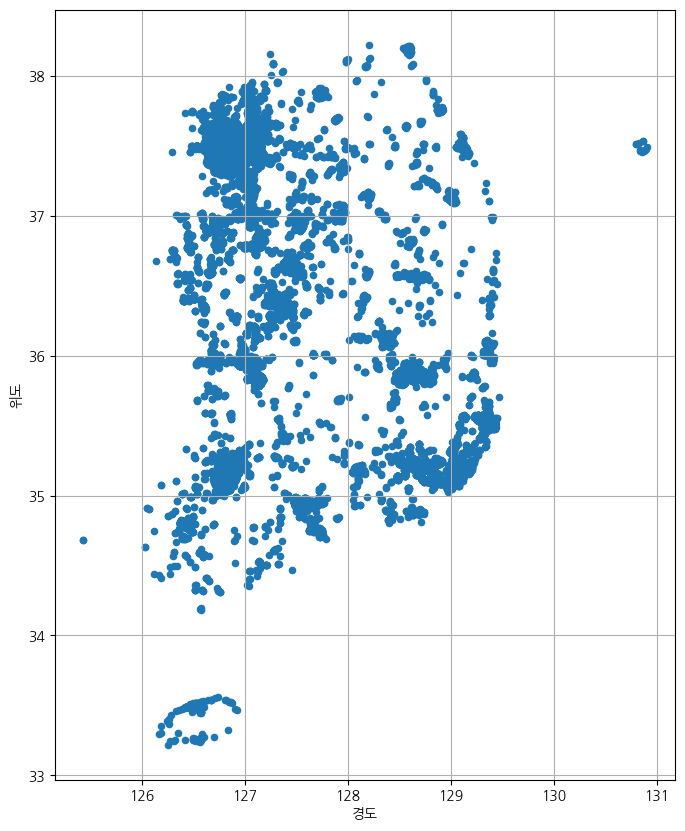

In [27]:
park.plot.scatter(x = '경도', y = '위도', figsize = (8,10), grid = True)

In [28]:
# 공원 면적
# np.sqrt(공원면적) * 0.01
# 제곱근을 이용하면 상대적인 비율을 보다 명확하게 구할 수 있다.
park['공원면적'].head()

0     9137.0
1    33756.0
2      646.0
3     1620.0
4     1009.0
Name: 공원면적, dtype: float64

In [29]:
# 파생변수
# '공원면적비율'
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x) * 0.01)

<ipython-input-29-f8c0e34064f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x) * 0.01)


In [30]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648


In [31]:
# 도로명 주소는 입력되지 않고 지번 주소만 입력된 데이터
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,032-770-6205,2019-07-30,3500000,인천광역시 동구,0.203199
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,2.367383
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,3.305480
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,054-680-6340,2019-09-05,5170000,경상북도 영양군,2.591505


In [32]:
# 도로명 주소, 지번 주소 모두 입력된 데이터
park.loc[(park['소재지도로명주소'].notnull()) & (park['소재지지번주소'].notnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,4.128014
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.366606
32,26440-00033,보람공원,근린공원,부산광역시 강서구 녹산산단262로14번길 20 (송정동),부산광역시 강서구 송정동 1718,35.088095,128.843216,27739.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.665503
38,26440-00039,지사공원(2호근린공원),근린공원,부산광역시 강서구 과학산단2로20번길 7-7 (지사동),부산광역시 강서구 지사동 1180,35.151337,128.831400,11232.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.059811
44,26440-00045,화암공원,근린공원,부산광역시 강서구 화전산단5로 131 (화전동),부산광역시 강서구 화전동 554-3,35.110563,128.877536,21908.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.480135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,11590-00040,국화원,소공원,"서울특별시 동작구 상도로30길 39(상도동, 상도두산위브아파트)",서울특별시 동작구 상도동 529 상도두산위브아파트,37.504836,126.943714,757.0,NaN,2019-02-20,3190000,서울특별시 동작구,0.275136
18121,28140-00011,창영공원,어린이공원,인천광역시 동구 우각로 26,인천광역시 동구 창영동 21-15,37.470778,126.639105,1019.8,032-770-6205,2019-07-30,3500000,인천광역시 동구,0.319343
18125,28140-00002,화도진공원,근린공원,인천광역시 동구 화도진로 114,인천광역시 동구 화수동 140-1,37.481481,126.628353,20830.0,032-770-6202,2019-07-30,3500000,인천광역시 동구,1.443260
18126,28140-00003,"인천교공원(A,B블럭)",근린공원,인천광역시 동구 방축로 231,인천광역시 동구 송림동 318,37.477844,126.669618,94068.0,032-770-6203,2019-07-30,3500000,인천광역시 동구,3.067051


In [33]:
# 도로명 주소와 지번주소 모두 입력되지 않은 데이터
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].isnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율


In [34]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채움
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

<ipython-input-34-1473722c7c49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)


In [35]:
park['소재지도로명주소'].isnull().sum()

0

In [36]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648


In [42]:
# split(expand = True) : 데이터프레임으로 분리되고 인덱싱과 슬라이싱 가능
park['소재지도로명주소'].str.split(' ', expand = True)

,0,1,2,3,4,5,6,7,8
0,부산광역시,강서구,구랑동,1199-7,None,None,None,None,None
1,부산광역시,강서구,구랑동,1219,None,None,None,None,None
2,부산광역시,강서구,대저1동,1330-7,None,None,None,None,None
3,부산광역시,강서구,대저2동,1870-67,None,None,None,None,None
4,부산광역시,강서구,대저2동,2407-1,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
18132,인천광역시,동구,송림동,291-6,None,None,None,None,None
18133,경상북도,영양군,영양읍,서부리,123,None,None,None,None
18134,경상북도,영양군,입암면,신구리,산27-5,None,None,None,None
18135,경상북도,영양군,수비면,발리리,산48,None,None,None,None


In [48]:
# 도로명 주소에서 '시도'만 추출해서 '시도' 파생변수를 만들고 park 데이터프레임에 추가
park['시도'] = park['소재지도로명주소'].str.split(' ', expand = True)[0]

In [49]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시


In [50]:
# 도로명 주소에서 '읍면동'만 추출해서 '읍면동' 파생변수를 만들고 park 데이터프레임에 추가
park['읍면동'] = park['소재지도로명주소'].str.split(' ', expand = True)[2]

In [51]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,읍면동
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.955877,부산광역시,구랑동
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,1.837281,부산광역시,구랑동
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.254165,부산광역시,대저1동
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.402492,부산광역시,대저2동
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,051-970-4536,2019-05-02,3360000,부산광역시 강서구,0.317648,부산광역시,대저2동


In [52]:
park['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [54]:
# '시도'에 '강원'이라고 잘못 표기된 데이터를 수정
park['시도'][park['시도'] == '강원'] = '강원도'

<ipython-input-54-5ee7d3d2fe76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['시도'][park['시도'] == '강원'] = '강원도'


In [55]:
park['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

<Axes: xlabel='경도', ylabel='위도'>

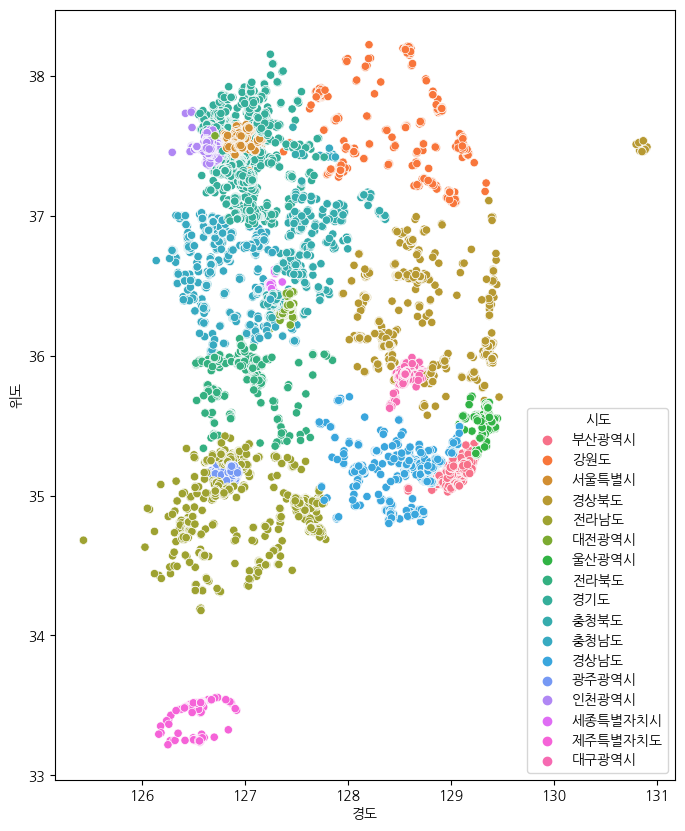

In [56]:
plt.figure(figsize = (8, 10))
sns.scatterplot(data = park, x = '경도', y = '위도', hue = '시도')

In [59]:
# 시도별 공원 비율

park_c = pd.DataFrame(park['시도'].value_counts())
park_c

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1744
충청남도,1723
전라북도,1137
경상북도,917
충청북도,898
울산광역시,887
인천광역시,675


In [60]:
# value_counts(normalize = True) : 전체 합계에 대한 비율이 계산
park_normalize = pd.DataFrame(park['시도'].value_counts(normalize = True))
park_normalize

,시도
경기도,0.182961
전라남도,0.103777
경상남도,0.100634
서울특별시,0.096168
충청남도,0.095010
전라북도,0.062696
경상북도,0.050565
충청북도,0.049518
울산광역시,0.048911
인천광역시,0.037221


In [64]:
# 시도별 합계 데이터와 비율 데이터를 병합
park_sido = park_c.merge(park_normalize, left_index = True, right_index = True).reset_index()
park_sido

,index,시도_x,시도_y
0,경기도,3318,0.182961
1,전라남도,1882,0.103777
2,경상남도,1825,0.100634
3,서울특별시,1744,0.096168
4,충청남도,1723,0.095010
5,전라북도,1137,0.062696
6,경상북도,917,0.050565
7,충청북도,898,0.049518
8,울산광역시,887,0.048911
9,인천광역시,675,0.037221


In [66]:
park_sido.columns = ['시도', '합계', '평균']
park_sido

,시도,합계,평균
0,경기도,3318,0.182961
1,전라남도,1882,0.103777
2,경상남도,1825,0.100634
3,서울특별시,1744,0.096168
4,충청남도,1723,0.095010
5,전라북도,1137,0.062696
6,경상북도,917,0.050565
7,충청북도,898,0.049518
8,울산광역시,887,0.048911
9,인천광역시,675,0.037221


<Axes: xlabel='시도', ylabel='합계'>

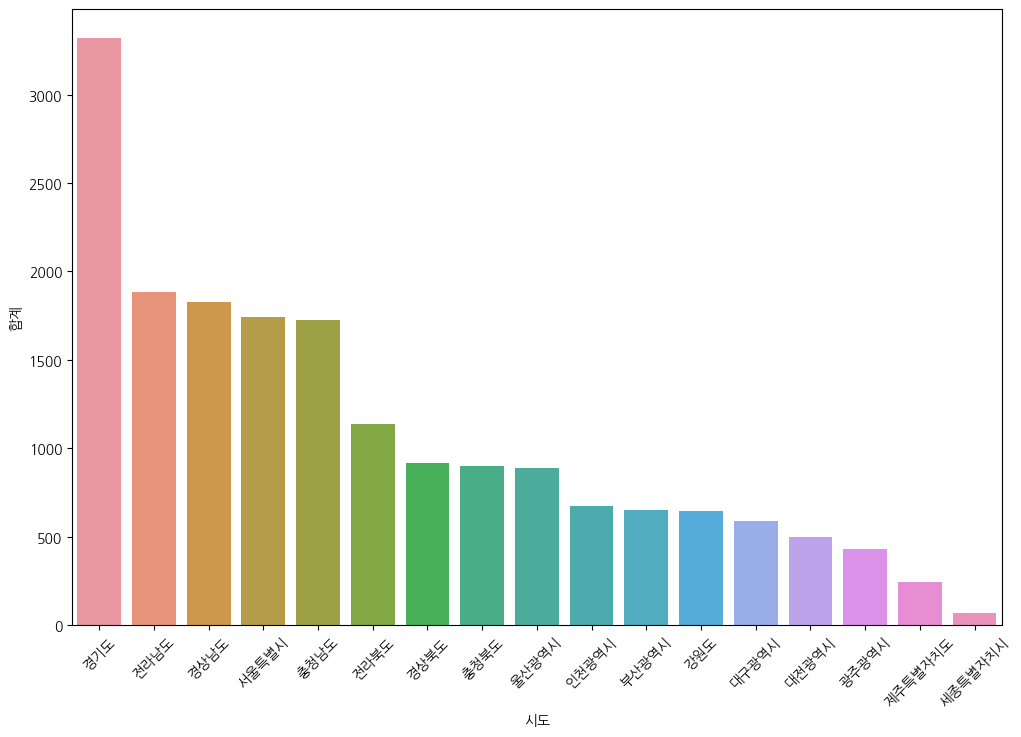

In [69]:
# 막대그래프 그리기
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 45)
sns.barplot(data = park_sido, x='시도', y = '합계')

<Axes: xlabel='합계', ylabel='시도'>

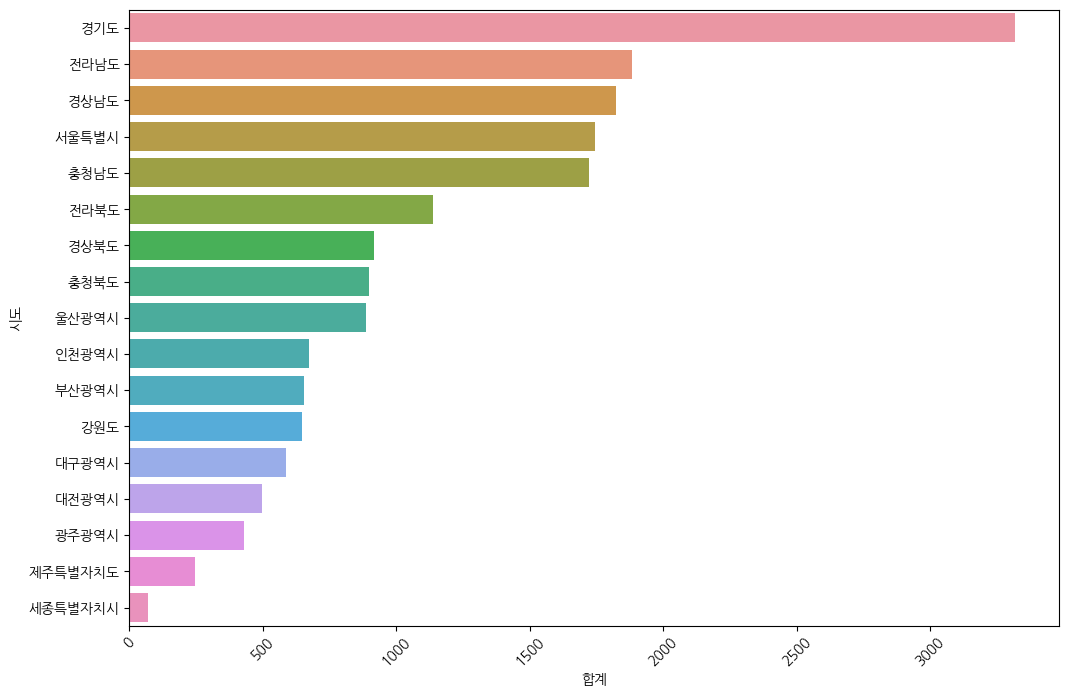

In [70]:
# 막대그래프 그리기
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 45)
sns.barplot(data = park_sido, x='합계', y = '시도')